In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import generative_model
import plot

In [4]:
model = generative_model.GenerativeModel()

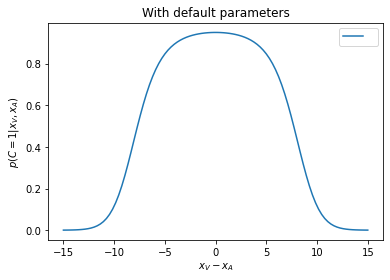

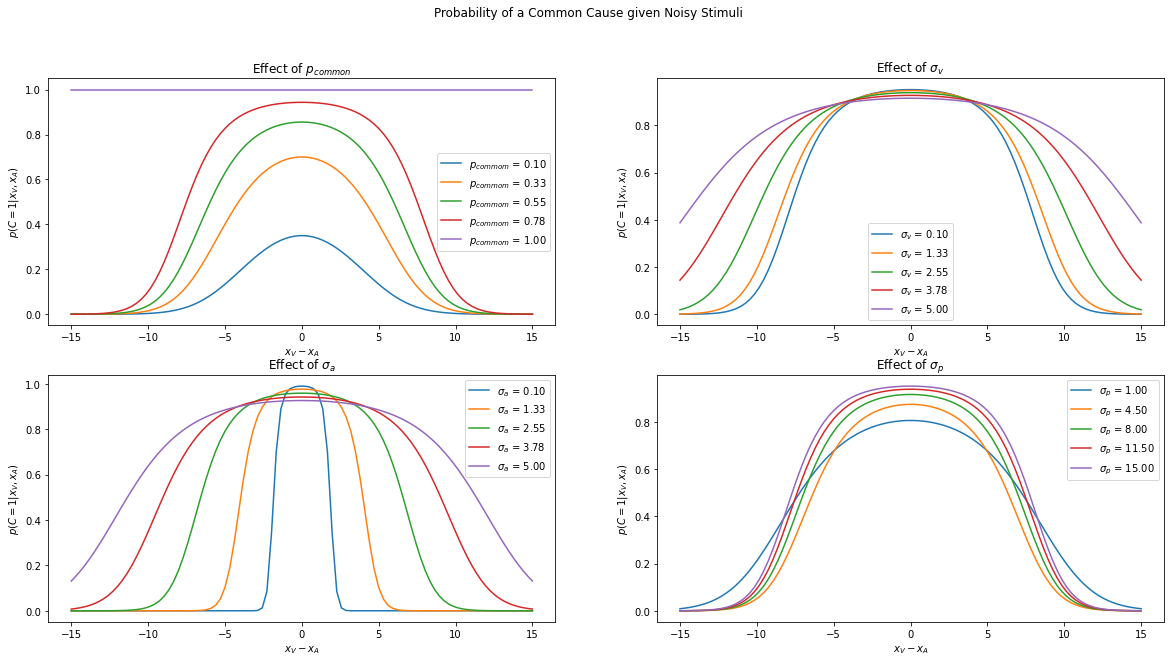

In [5]:
x_v, x_a = np.linspace(-15, 15, 100), 0

plot.plot_figure(x_v-x_a, model.probability_cause(x_v, x_a), '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='With default parameters')
plot.plot_probability_varying_parameters(x_v, x_a, model.probability_cause, '$x_V-x_A$', '$p(C=1|x_V, x_A)$', title='Probability of a Common Cause given Noisy Stimuli')

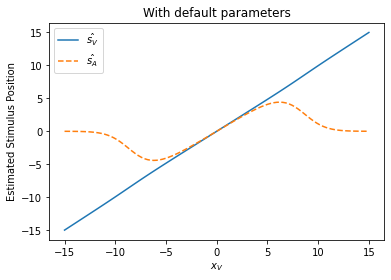

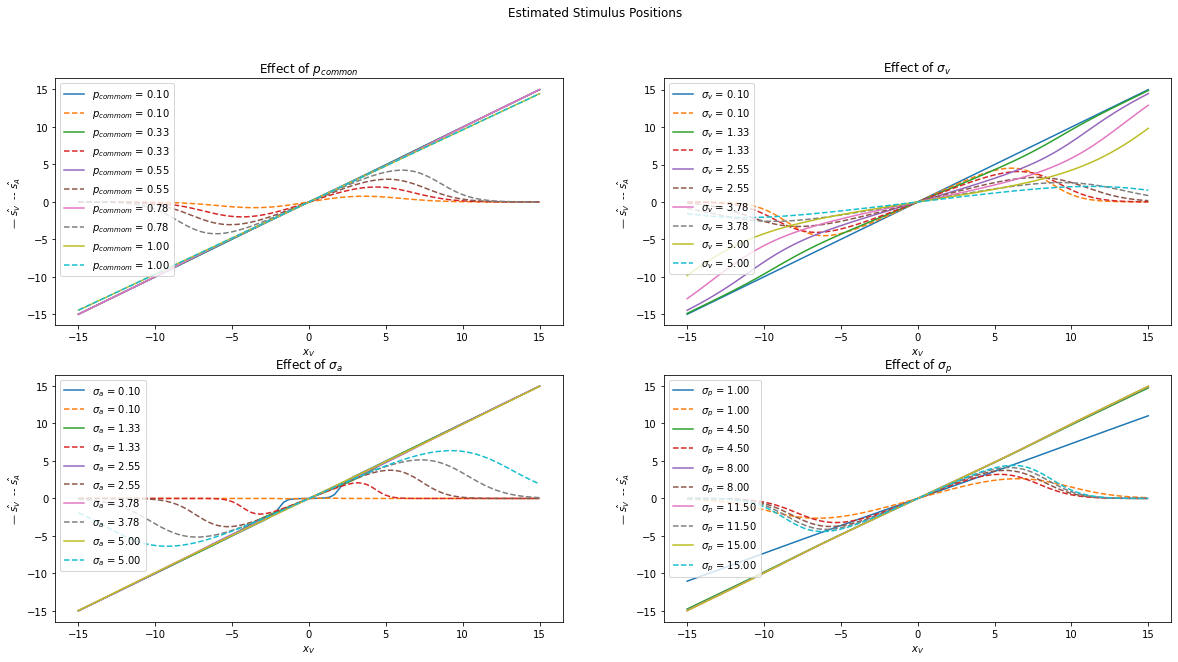

In [6]:
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='video'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_V}$', title='With default parameters')
plot.plot_figure(x_v-x_a, model.estimate_signal(x_v, x_a, type='audio'), '$x_V$', 'Estimated Stimulus Position', '$\hat{s_A}$', title='With default parameters', fmt='--')

plot.plot_estimate_stimulus_position(x_v, x_a, model.estimate_signal, '$x_V$', '— $\hat{s_V}$  -- $\hat{s_A}$', title='Estimated Stimulus Positions')

### 2.a

In [66]:
trials = 10000
s, is_common = model.create_stimulus_pairs(trials)